### Импорты

In [85]:
import pandas as pd
from pandas import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn as sns

### Чтение данных из файла в датафрейм 

In [86]:
data = pd.read_csv(
    'data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv'
)

### Верхние 5 строк

In [87]:
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


### Отображение информации о колонках фрейма

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

### Замена всех "Not available" данных на NaN 

In [89]:
data = data.replace({'Not Available': np.nan})

### Конвертация всех данных, имеющих числовой смысл, но хранящихся не как числа в тип float. 

In [90]:
for col in list(data.columns):
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in
    col or 'therms' in col or 'gal' in col or 'Score' in col):
        data[col] = data[col].astype(float)

### Определение колонок, имеющих отсутствующие данные

In [91]:
def missing_values_table(df) -> DataFrame:
        """
        Функция для расчета количества и процента отсутствующих значений для каждой колонки
        :param df: датафрейм
        :return: таблица с количеством и процентом отсутствующих значений для каждой колонки
        """
        # Общее число отсутствующих значений 
        mis_val = df.isnull().sum()
        
        # Процент от общего числа значений
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Таблица с результатами расчета
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Переименование колонок
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Сортировка по проценту отсутствующих значений
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Вывод информации
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Возврат таблицы с отсутствующими значениями
        return mis_val_table_ren_columns

missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


### Удаление колонок, имеющих более 50% отсутствующих данных

In [92]:
missing_df = missing_values_table(data)
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))
data = data.drop(columns = list(missing_columns))

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.
We will remove 11 columns.


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 49 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

# Удаление аномальных данных

In [94]:
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%'] # первый квартиль
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']  # третий квартиль
iqr = third_quartile - first_quartile # интерквартильный размах
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

# График распределения значений 

Text(0.5, 1.0, 'Energy Star Score Distribution')

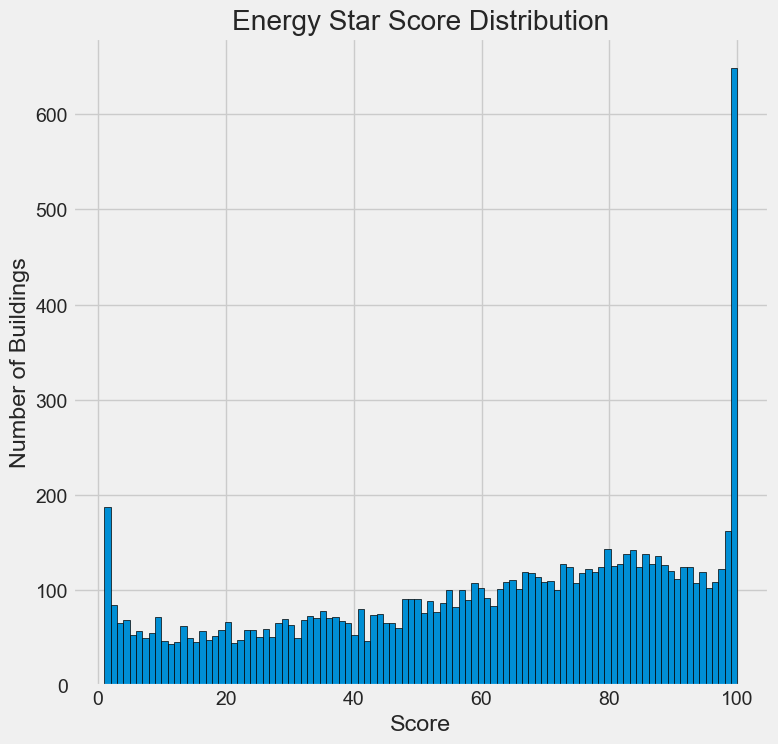

In [95]:
figsize(8, 8)

# Переименование столбца
data = data.rename(columns = {'ENERGY STAR Score': 'score'})

# Построение графика Energy Star Score 
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Score')
plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution')

# Список зданий с количеством измерений больше 100

In [96]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

# График плотности Energy Star Score раскрашенный в зависимости от типа здания

/var/folders/df/v02b0vfx2tbc5plrdx4v6gk80000gn/T/ipykernel_20764/299347037.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'].dropna(),
/var/folders/df/v02b0vfx2tbc5plrdx4v6gk80000gn/T/ipykernel_20764/299347037.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'].dropna(),
/var/folders/df/v02b0vfx2tbc5plrdx4v6gk80000gn/T/ipykernel_20764/299347037.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'].dropna(),
/var/folders/df/v02b0vfx2tbc5plrdx4v6gk80000gn/T/ipykernel_20764/299347037.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.


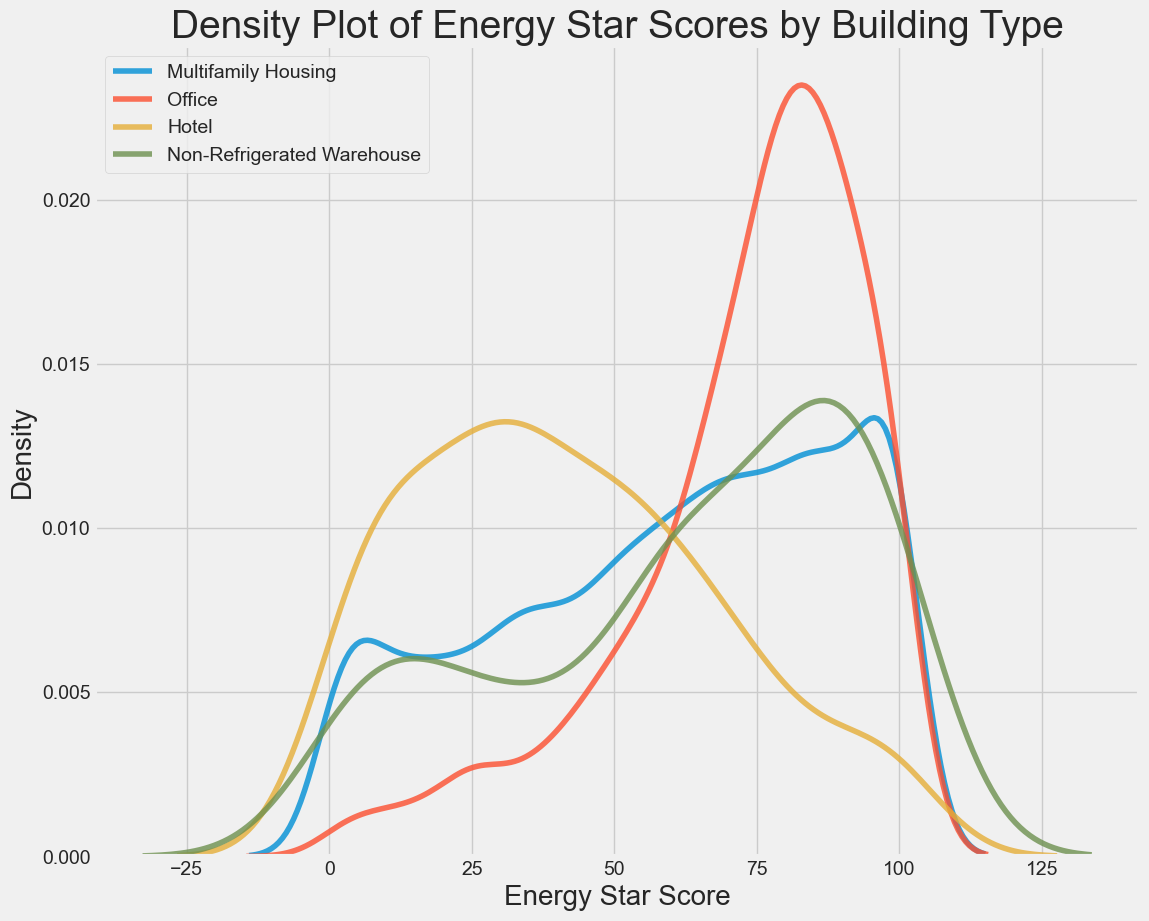

In [97]:
# Plot of distribution of scores for building categories
figsize(12, 10)
# Plot each building
for b_type in types:
# Select the building type
    subset = data[data['Largest Property Use Type'] == b_type]
    # Density plot of Energy Star Scores
    sns.kdeplot(subset['score'].dropna(),
    label = b_type, shade = False, alpha = 0.8)
    # label the plot
plt.xlabel('Energy Star Score', size = 20)
plt.ylabel('Density', size = 20)
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28)
plt.legend()

# Список боро с количеством измерений больше 100

In [98]:
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

# Построение графика распределения оценок Energy Star для каждого боро

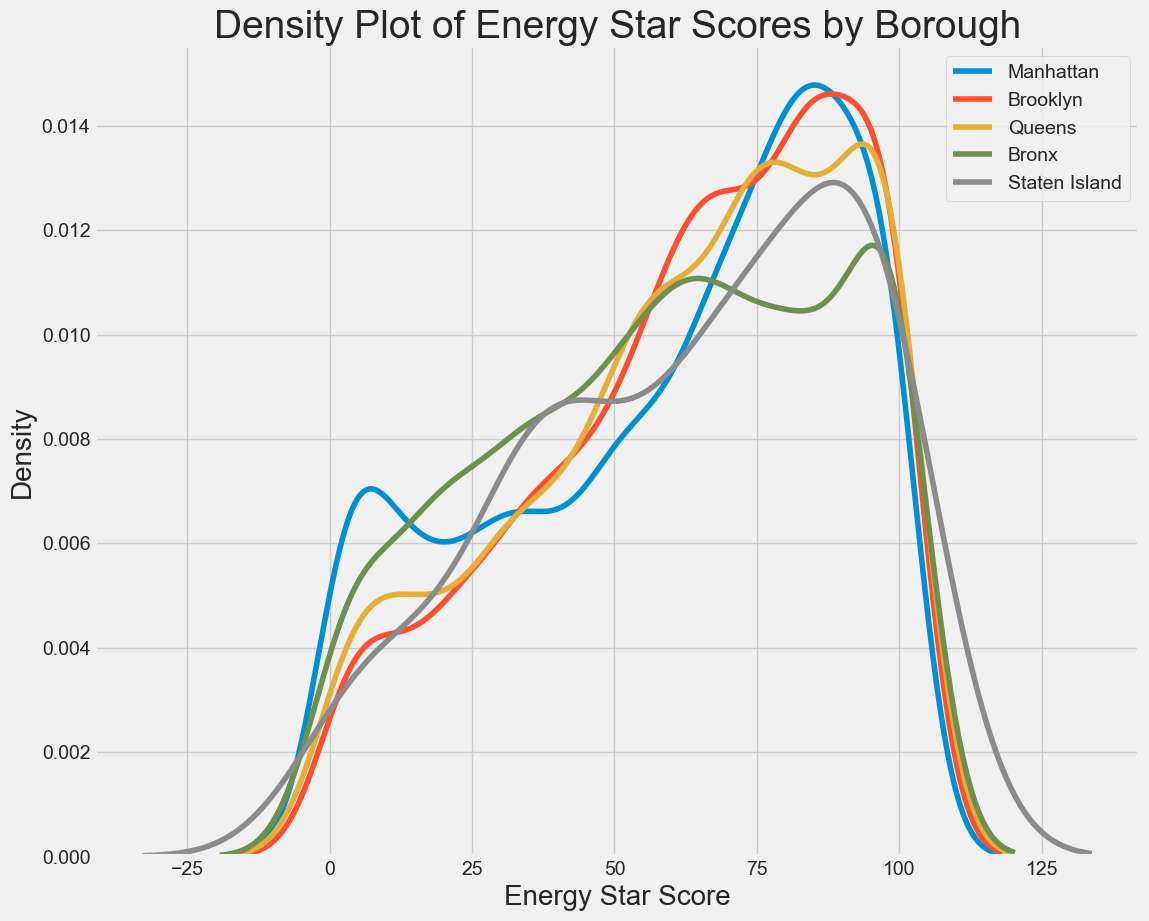

In [99]:
figsize(12, 10)

# Построение графика для каждого боро
for borough in boroughs:
    # Выбор боро
    subset = data[data['Borough'] == borough]
    
    # График плотности оценок Energy Star
    sns.kdeplot(subset['score'].dropna(),
               label = borough)
    
# Подпись графика
plt.xlabel('Energy Star Score', size = 20)
plt.ylabel('Density', size = 20)
plt.title('Density Plot of Energy Star Scores by Borough', size = 28)
plt.legend()

# Нахождение корреляций в Energy Star Score и их сортировка

In [100]:
# Нахождение всех корреляций и сортировка
correlations_data = data.corr()['score'].sort_values()

# Печать самых отрицательных корреляций
print(correlations_data.head(15), '\n')

# Печать самых положительных корреляций
print(correlations_data.tail(15))

ValueError: could not convert string to float: 'Cadman Towers'

# Логарифмизация, квадратный корень, обработка в унитарный код, самые позитивные и негативные корреляции

In [101]:
# Выбор всех числовых столбцов
numeric_subset = data.select_dtypes('number')

# Создание столбцов с квадратным корнем и логарифмом для всех столбцов
for col in numeric_subset.columns:
    # 
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Выбор семантических столбцов
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score
correlations = features.corr()['score'].dropna().sort_values()

/Users/grindelf/Programming/my/python/data-analysis-example/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/grindelf/Programming/my/python/data-analysis-example/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/grindelf/Programming/my/python/data-analysis-example/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/grindelf/Programming/my/python/data-analysis-example/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/grindelf/Programming/my/python/data-analysis-example/venv/lib/python3.9/site-packages/pan

In [102]:
# Вывод самых отрицательных корреляций
correlations.head(15)

Site EUI (kBtu/ft²)                                            -0.723864
Weather Normalized Site EUI (kBtu/ft²)                         -0.713993
sqrt_Site EUI (kBtu/ft²)                                       -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)                    -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)                  -0.671044
sqrt_Source EUI (kBtu/ft²)                                     -0.669396
Weather Normalized Source EUI (kBtu/ft²)                       -0.645542
Source EUI (kBtu/ft²)                                          -0.641037
log_Source EUI (kBtu/ft²)                                      -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)                   -0.620329
log_Site EUI (kBtu/ft²)                                        -0.612039
log_Weather Normalized Site EUI (kBtu/ft²)                     -0.601332
log_Weather Normalized Site Electricity Intensity (kWh/ft²)    -0.424246
sqrt_Weather Normalized Site Electricity Intensity 

In [103]:
# Вывод самых положительных корреляций
correlations.tail(15)

sqrt_Order                                                         0.028662
Borough_Queens                                                     0.029545
Largest Property Use Type_Supermarket/Grocery Store                0.030038
Largest Property Use Type_Residence Hall/Dormitory                 0.035407
Order                                                              0.036827
Largest Property Use Type_Hospital (General Medical & Surgical)    0.048410
Borough_Brooklyn                                                   0.050486
log_Community Board                                                0.055495
Community Board                                                    0.056612
sqrt_Community Board                                               0.058029
sqrt_Council District                                              0.060623
log_Council District                                               0.061101
Council District                                                   0.061639
Largest Prop

# График взаимосвязей Energy Star Score и EUI

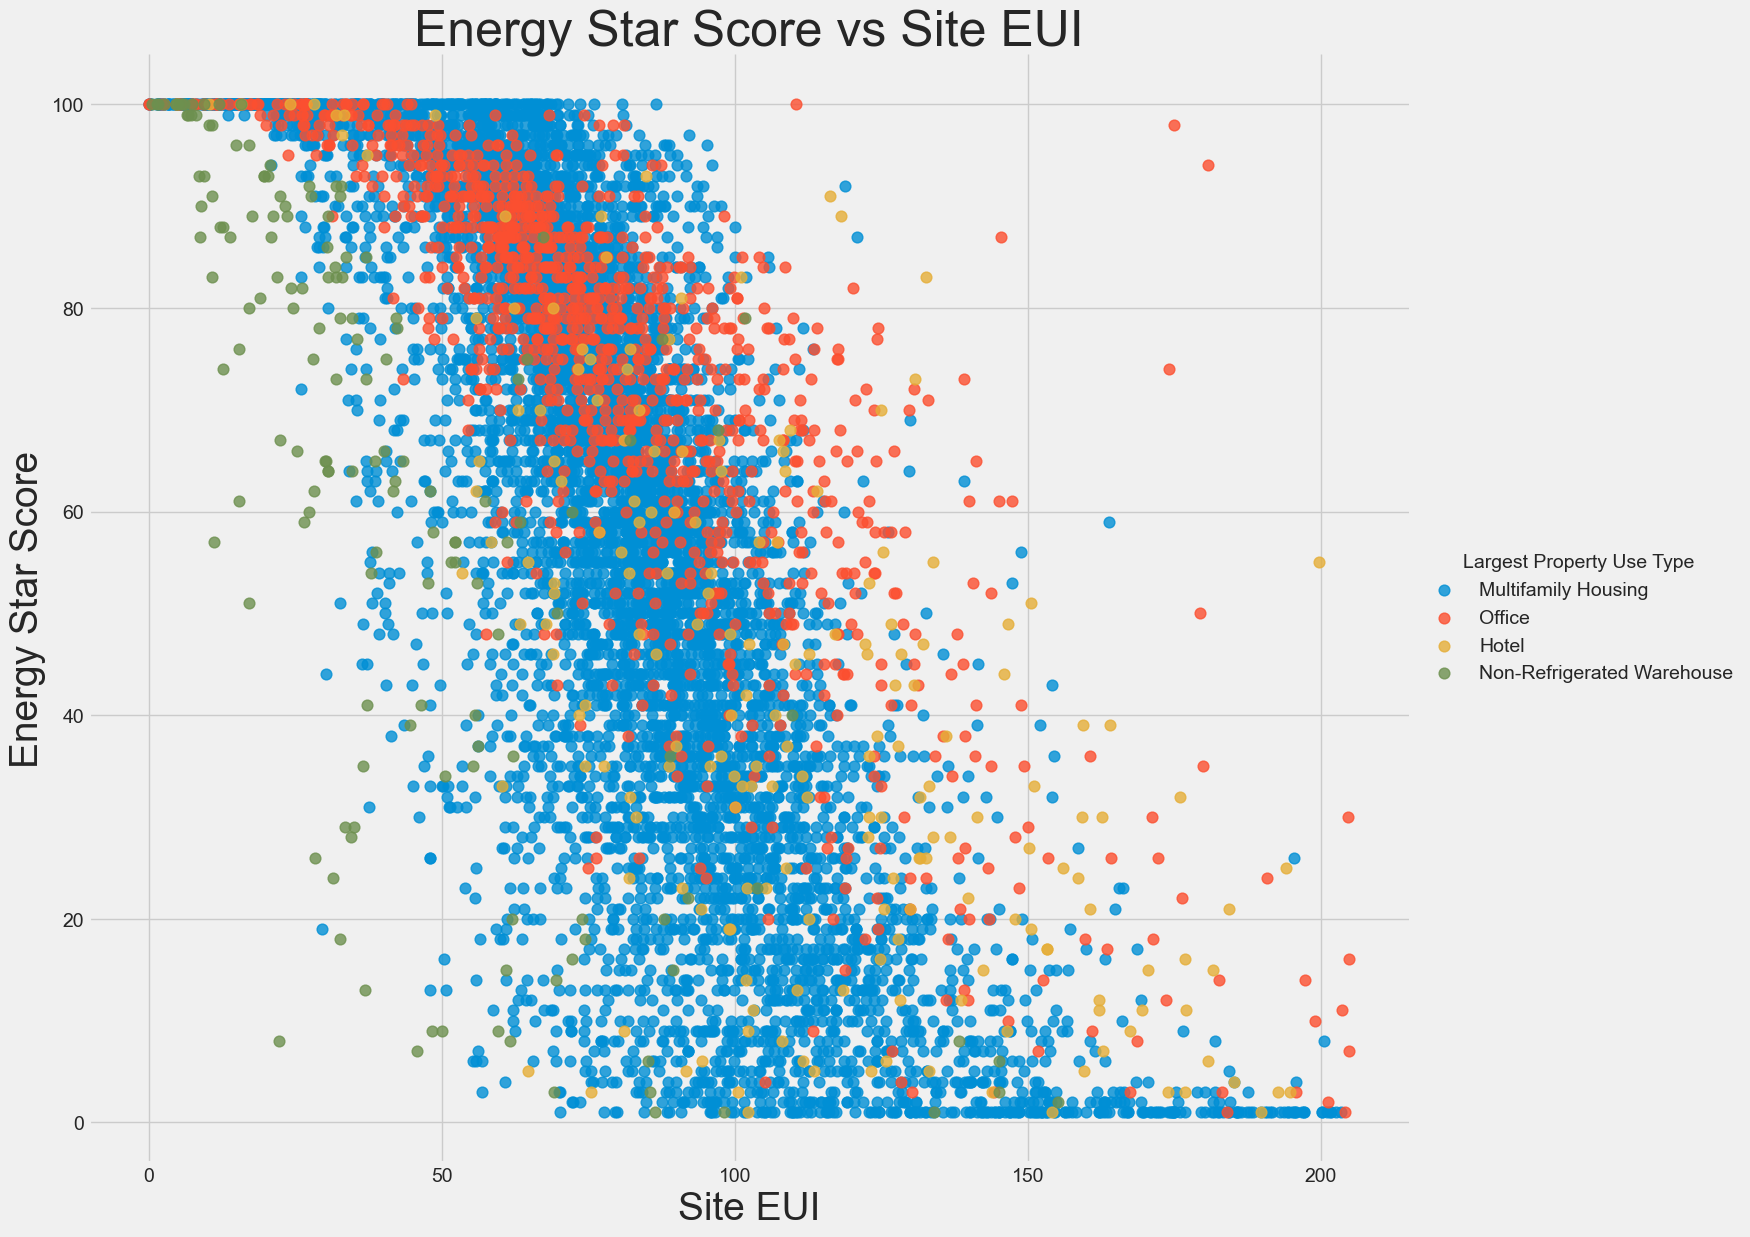

In [104]:
figsize(12, 10)

# Extract the building types
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot(x='Site EUI (kBtu/ft²)', y='score',
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          height = 12, aspect = 1.2)

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

# Парный график

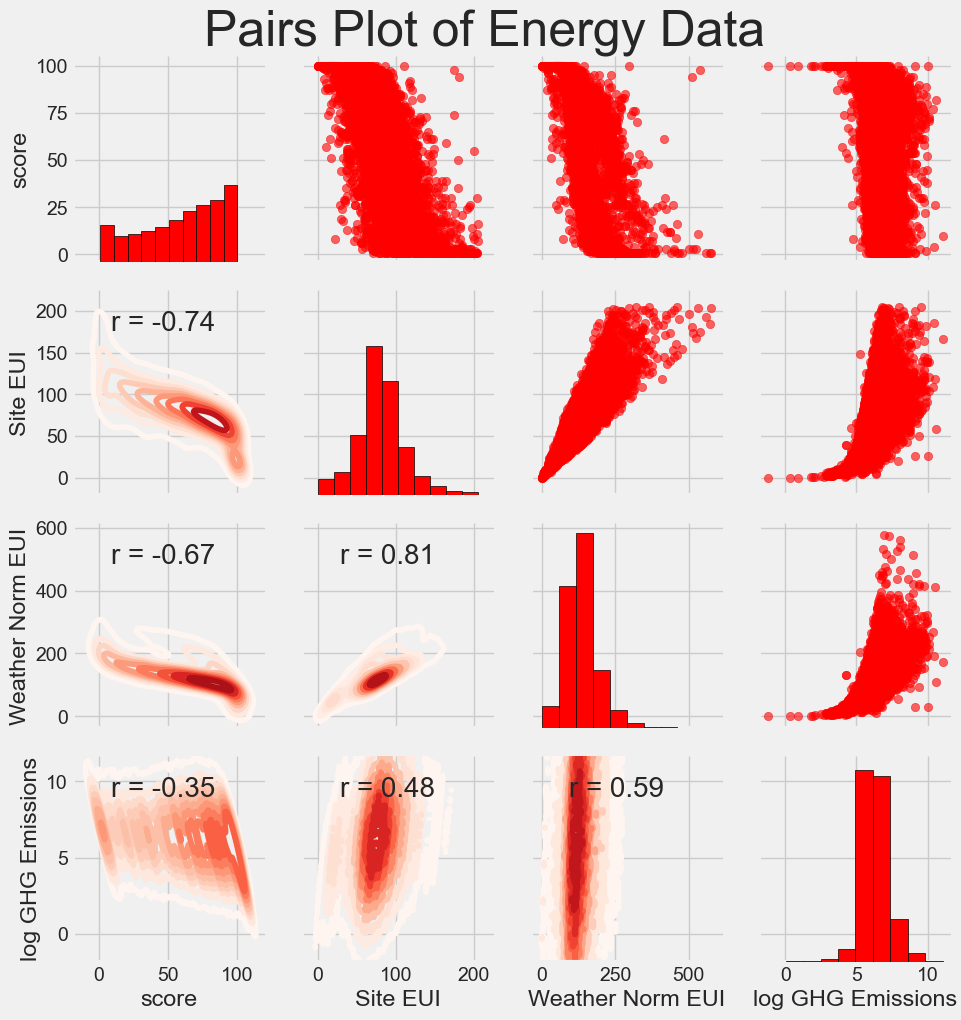

In [105]:
# Extract the columns to  plot
plot_data = features[['score', 'Site EUI (kBtu/ft²)',
                      'Weather Normalized Source EUI (kBtu/ft²)',
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI',
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

In [106]:
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

/Users/grindelf/Programming/my/python/data-analysis-example/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/grindelf/Programming/my/python/data-analysis-example/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/grindelf/Programming/my/python/data-analysis-example/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/grindelf/Programming/my/python/data-analysis-example/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/grindelf/Programming/my/python/data-analysis-example/venv/lib/python3.9/site-packages/pan

(11319, 110)

# Удаление коллинеарных признаков

In [107]:
def remove_collinear_features(x, threshold):
    """
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.

    Inputs:
        threshold: any features with correlations greater than this value are removed

    Output:
        dataframe that contains only the non-highly-collinear features
    """

    # Don't want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)',
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])

    # Add the score back in to the data
    x['score'] = y

    return x


features = remove_collinear_features(features, 0.6)
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 65)

Text(0.5, 1.0, 'Weather Norm EUI vs Site EUI, R = 0.9968')

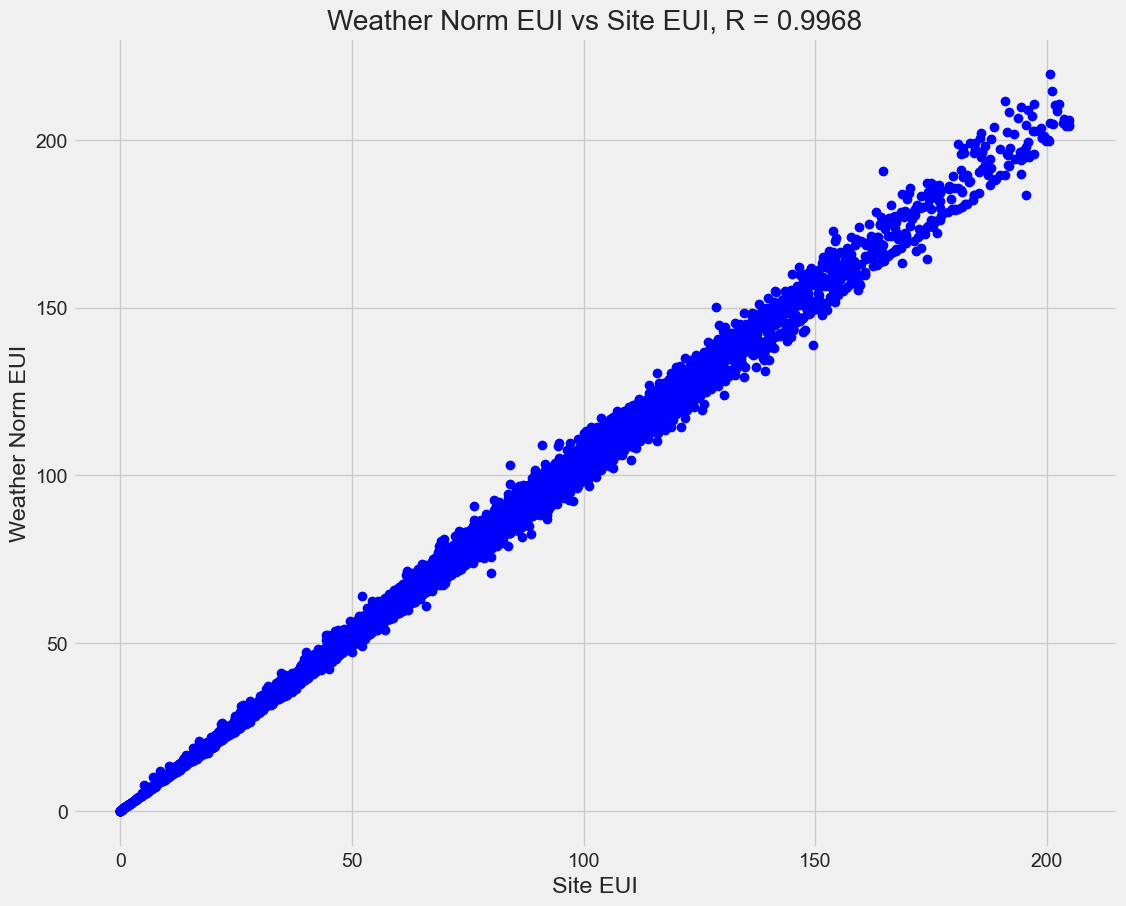

In [108]:
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1])

# Базовый уровень

In [109]:
from sklearn.model_selection import train_test_split

# Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)
print()

# Separate out the features and targets
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(1858, 65)
(9461, 65)

(6622, 64)
(2839, 64)
(6622, 1)
(2839, 1)


# MAE - средняя абсолютная ошибка

In [110]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
  return np.mean(abs(y_true - y_pred))

baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 24.5164
